<a href="https://colab.research.google.com/github/kuihao/AIoT_Temperature-Humidity-and-Prediction-using-RaspberryPi/blob/master/testing/%E5%A2%9E%E5%8A%A0Function%E7%B6%AD%E5%BA%A6_%E6%B8%AC%E8%A9%A6SGD%E7%9A%84%E8%AE%8A%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
'''
【使用AdaGrad】
課堂測試數據 Demo：https://youtu.be/1UqCjFQiiy0
程式碼參考：https://colab.research.google.com/drive/1l_2jQ2t6FEPwTB6G7kiIFNOLRJOFU8LF?usp=sharing#scrollTo=TOAvOQ09fffp
程式碼破譯間接參考：https://ithelp.ithome.com.tw/articles/10225858
'''
# step 1. 引入 NumPy 與 Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# step 2. 建立數值陣列
# x_data = [n] # 就是 Model Function 的 Input data
# y_data = [n] # 就是 Model Function 的 Output data (監督式學習就是 Ground Truth、測試時的輸出預測值)
x_data = [ 338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

# step 2.5. 假設模型 例如：y_data = w_2 * x_data**2 + w * x_data + b
# step 3. 建立網格資料 
# 繪製的「彩色的等高線圖就是 Loss Function Space」，兩個維度分別代表參數 w 與 b
# 以下的 x, y 並不是指訓練資料，而是 Linear Model 的兩個參數 (w, b) 的自行設定的可能範圍
# 分別建立兩個一維等差陣列 x 與 y，其範圍是 # 到 #，每隔 # 產生一個值。
x = np.arange(-200,-100,1) #bias shape:(100,) 
y = np.arange(-5,5,0.1) #weight shape:(100,) 
# 接著，我們建立了一個二維陣列 Z 來儲存每一個 X[n](bias), Y[n](weight) 位置上的「損失函數值」
# 注意陣列 Z 的存取，根據 pyplot 定義的參數，它會直接將矩陣內容繪製在畫布上，
# 因此 x, y 座標跟矩陣儲存示正好相反的 (y對應矩陣的列, x對應矩陣的行)， Z[y座標][x座標]
# 損失函數 L 為 L(w2, w, b) = ((y_data[n] - (w2*x_data[n]**2 + w*x_data[n] + b) )**2)/n
# [!!!]以下等高線繪圖維持在一次式
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        # Z 矩陣相當於整張圖，每個 Entry 存放座標 (b, w) 代入損失函數的 Loss 值
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        # 將所有訓練資料帶入計算該座標 (b, w)的 Loss 值
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - (w*x_data[n] + b))**2
        Z[j][i] = np.sqrt(Z[j][i]/len(x_data))

In [181]:
# step 4. 決定參數
# 這裡決定 w 與 b 的起始點（從哪裡開始走）、learning rate（每一步走多遠）、
# iteration 次數（我們要走多少步）、
# 以及最後我們用兩個陣列，來分別儲存每一步我的走到的位置
# 決定 w 與 b 的起始點
# SGD(Stochastic Gradient Descent, 隨機梯度下降法) 的技巧：
# 只針對 SSE (Sum Square Error, 誤差平方和) 進行微分，
# 而非整個損失函式之 MSE (Mean Squared Error) 或 RMSE (Root Mean Square Error) 
w2 = 0
w = 1
b = -180

# 決定 learning rate
lr = 1 # 0.0000001 

# 決定 iteration 的次數
iteration = 100000

# 給予 b, w 各自不同的 learning rate
w2_lr = 0.0
w_lr = 0.0
b_lr = 0.0

In [182]:
# 儲存每一次 iterate 後的結果
w2_history.clear()
w_history.clear()
b_history.clear()
w2_history = [w2]
w_history = [w]
b_history = [b]

# step 5. 執行梯度下降
# 執行梯度下降
for i in range(iteration):
    w2_grad = 0.0
    w_grad = 0.0
    b_grad = 0.0
    
    # 計算損失函數分別對 w 和 b 的偏微分 (計算梯度決定參數的調整變量)
    # 把每組資料計算微分之後加總起來
    for n in range(len(x_data)):
        w_grad = 0.0
        w_grad = w_grad  + 2.0*(y_data[n] - (w*x_data[n] + b))*x_data[n]*(-1)
        b_grad = b_grad  + 2.0*(y_data[n] - (w*x_data[n] + b))*(-1.0)
        
    # v2 - AdaGrad: learning rate 加上了梯度平方
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2

    # 更新 w, b 位置 
    # w = w - lr * w_grad
    # b = b - lr * b_grad
    # v2 - ada
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # 紀錄 w, b 的位置 
    w_history.append(w)
    b_history.append(b)

    #-----文字紀錄 Loss(Error)值-----#
    loss = np.sqrt(np.mean(np.power(( np.dot(x_data, w)+b ) - y_data, 2)))
    if (i%10000 == 0)|(i == (iteration - 1)):
      print('Iteration = ', i, ' Loss = ', loss)
print(len(w_history))

Iteration =  0  Loss =  215.07208094032103
Iteration =  10000  Loss =  100.96372180567884
Iteration =  20000  Loss =  100.96372115561947
Iteration =  30000  Loss =  100.96372115561641
Iteration =  40000  Loss =  100.96372115561644
Iteration =  50000  Loss =  100.96372115561644
Iteration =  60000  Loss =  100.96372115561644
Iteration =  70000  Loss =  100.96372115561644
Iteration =  80000  Loss =  100.96372115561644
Iteration =  90000  Loss =  100.96372115561644
Iteration =  99999  Loss =  100.96372115561644
100001


In [ ]:
# [!!!]以下等高線繪圖維持在一次式
# strp 6. 繪圖
# 建立等高線圖
plt.contourf(x,y,Z, 25, alpha=0.5, cmap=plt.get_cmap('jet')) # Contour line Region = 50
# 繪製目標點(隱藏的，已由公式解證明此為一次函數的最佳解: loss=100.96372115561644)
# plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='red')
# 繪製起點
#plt.plot([b_history[0]], [w_history[0]], 's', ms=12, markeredgewidth=3, color='orange')   # starting parameter
# 繪製 w,b iteration 的結果
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black') # ms = markersize, lw = linewidth 
# 繪製結束時的參數
plt.plot([b_history[-1]], [w_history[-1]], 'x', ms=12, markeredgewidth=3, color='orange')   # ending parameter
# 定義圖形範圍
plt.xlim(-200,-100)
plt.ylim(-5,5) # plt.axis([-200, -100, -5, 5])
# 繪製 x 軸與 y 軸的標籤
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
# 標上等高線數值
C = plt.contour(x, y, Z, 10, colors='black', linewidths=0.05)
plt.clabel(C, inline=True, fontsize=10)

loss_now = np.sqrt(np.sum(np.power(( np.dot(x_data, w)+b ) - y_data, 2))/len(x_data))
print( 'loss(error) = ', loss_now, ' NOW' )
plt.show

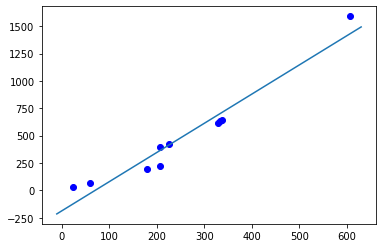

In [183]:
# 畫出訓練資料與 Linear Function 的關係圖
fig = plt.figure()
paint = fig.add_subplot()
plt.plot(x_data, y_data, 'o', c='blue')
x_pos = np.linspace(-10, 630, 640)
y_pos = w2_history[-1]*(x_pos**2) + w_history[-1]*x_pos + b_history[-1]
plt.plot(x_pos, y_pos)

In [160]:
def T(A):
  return np.transpose(A)
a = np.array([[1., 2., 3.]])
a = a.reshape(1,3)
print( np.sqrt(a**2) )
print( np.dot(a, T(a)) )
#print( np.matmul( a, [1, 1, 1] ) )

[[1. 2. 3.]]
[[14.]]
